#  2025 AIOps Capstone Project
## SRE Crisis Simulation - Complete the Analysis to Prevent System Meltdown

**Your Mission**: You're the new Senior AIOps Analyst at TechCorp. Use AI/ML to detect hidden threats, predict capacity crises, and deliver actionable intelligence.

---

## PHASE 1: CRISIS ASSESSMENT - Load 2025 Operational Data

**Task**: Load the three critical datasets from the capstone project directory and prepare them for analysis

In [4]:
# CELL 1.1: Load NEW datasets from capstone project directory
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
import warnings
warnings.filterwarnings('ignore')

DATA_DIR = r'C:\Users\sonu.rajan\Documents\AIOps\AIOps Final Project\data\capstone-project'

# dataset paths
metrics_path = os.path.join(DATA_DIR, 'system_metrics.csv')
logs_path = os.path.join(DATA_DIR, 'application_logs.txt')
incidents_path = os.path.join(DATA_DIR, 'incident_alerts.csv')

# Load system metrics and prepare timestamp
df = pd.read_csv(metrics_path)
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.sort_values('timestamp').set_index('timestamp')

# Load application logs
with open(logs_path, 'r', encoding='utf-8', errors='ignore') as f:
    lines = [line.strip() for line in f if line.strip()]

df_logs = pd.DataFrame({'raw': lines})

# Load incident data
incidents_df = pd.read_csv(incidents_path)
incidents_df['incident_timestamp'] = pd.to_datetime(incidents_df['incident_timestamp'])

print(" Datasets loaded successfully!")
print(f"System metrics: {df.shape}")
print(f"Application logs: {len(df_logs)} entries")
print(f"Incident alerts: {len(incidents_df)} incidents")

 Datasets loaded successfully!
System metrics: (1393, 5)
Application logs: 2000 entries
Incident alerts: 10 incidents


## PHASE 1: CRISIS ASSESSMENT - System Health Check

**Task**: Analyze current system status and identify the most critical metric that needs immediate attention

In [5]:
# CELL 1.2: Analyze current system status and identify critical metrics
print(" CURRENT SYSTEM STATUS ANALYSIS:")
print(f"Date range: {df.index.min()} to {df.index.max()}")

# Calculate current values for key metrics
current_cpu = df['cpu_usage'].iloc[-1]
current_memory = df['memory_usage'].iloc[-1]
current_disk = df['disk_usage'].iloc[-1]

print(f"\n CURRENT METRIC VALUES:")
print(f"CPU Usage: {current_cpu:.1f}%")
print(f"Memory Usage: {current_memory:.1f}%")
print(f"Disk Usage: {current_disk:.1f}%")

# Identify the most critical metric (highest usage)
metrics = ['cpu_usage', 'memory_usage', 'disk_usage']
current_values = {metric: df[metric].iloc[-1] for metric in metrics}
critical_metric = max(metrics, key=lambda x: current_values[x])

print(f"\n MOST CRITICAL METRIC: {critical_metric} at {current_values[critical_metric]:.1f}%")

 CURRENT SYSTEM STATUS ANALYSIS:
Date range: 2025-01-01 00:00:00 to 2025-02-28 00:00:00

 CURRENT METRIC VALUES:
CPU Usage: 61.1%
Memory Usage: 62.8%
Disk Usage: 85.3%

 MOST CRITICAL METRIC: disk_usage at 85.3%


## PHASE 1: CRISIS ASSESSMENT - Create System Health Dashboard

**Task**: Visualize the current system state to understand the crisis severity

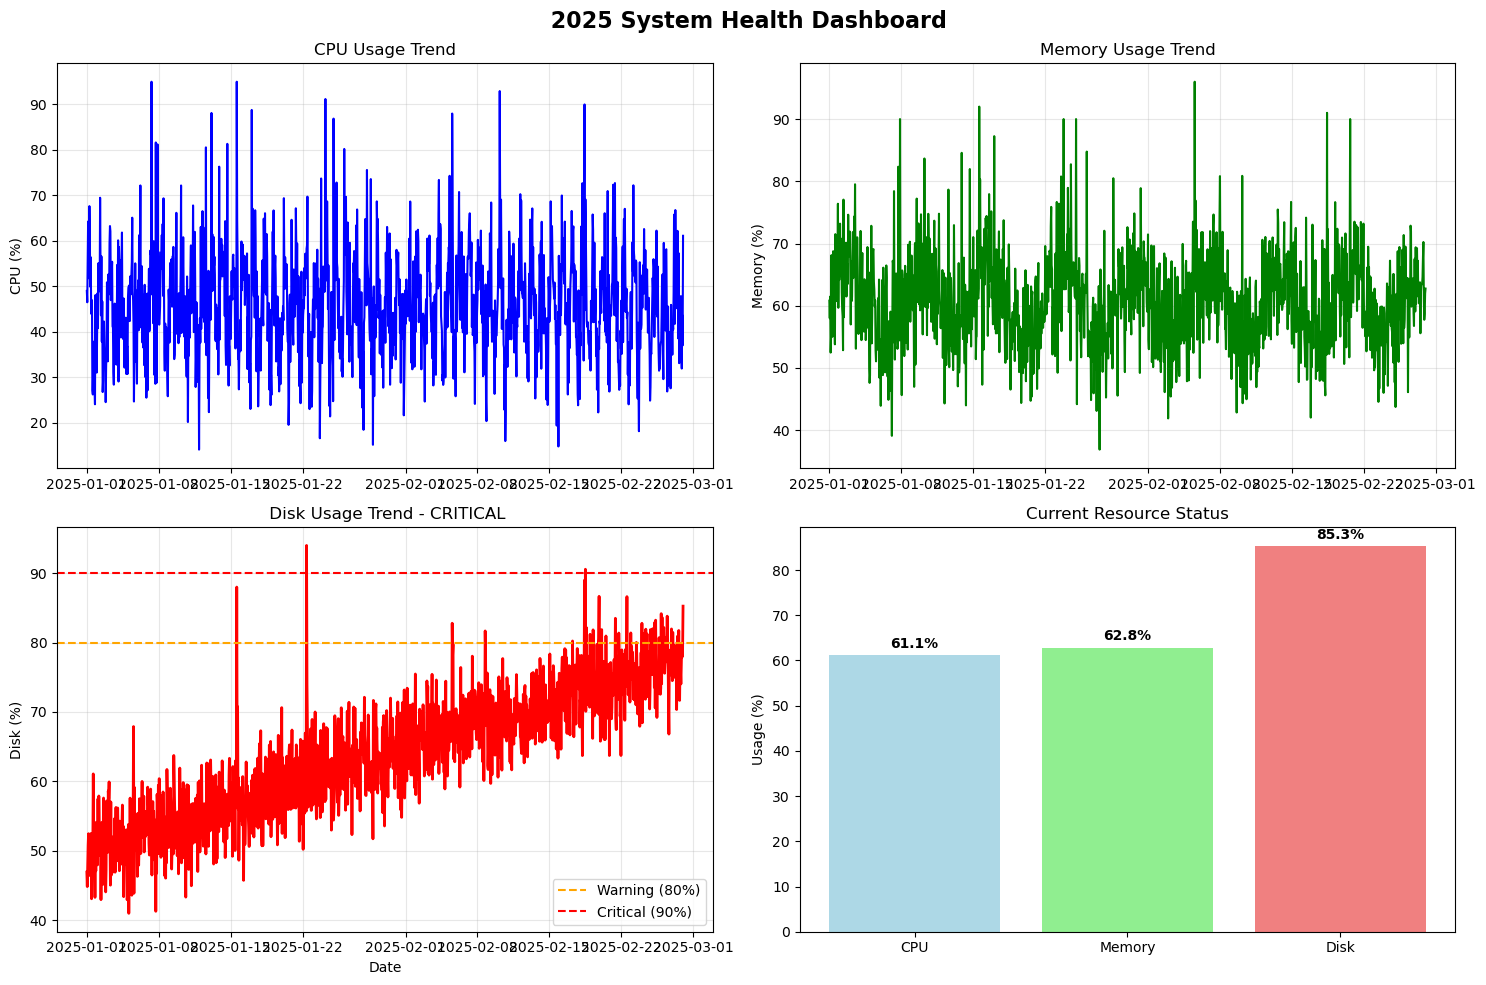

 System health dashboard created successfully!


In [6]:
# CELL 1.3: Create system health visualization dashboard
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle(' 2025 System Health Dashboard', fontsize=16, fontweight='bold')

# Plot CPU usage trend
axes[0,0].plot(df.index, df['cpu_usage'], color='blue', linewidth=1.5)
axes[0,0].set_title('CPU Usage Trend')
axes[0,0].set_ylabel('CPU (%)')
axes[0,0].grid(True, alpha=0.3)

# Plot Memory usage trend
axes[0,1].plot(df.index, df['memory_usage'], color='green', linewidth=1.5)
axes[0,1].set_title('Memory Usage Trend')
axes[0,1].set_ylabel('Memory (%)')
axes[0,1].grid(True, alpha=0.3)

# Plot Disk usage trend (most critical)
axes[1,0].plot(df.index, df['disk_usage'], color='red', linewidth=2)
axes[1,0].set_title(' Disk Usage Trend - CRITICAL')
axes[1,0].set_ylabel('Disk (%)')
axes[1,0].set_xlabel('Date')
axes[1,0].grid(True, alpha=0.3)

# Add threshold lines to disk plot
axes[1,0].axhline(y=80, color='orange', linestyle='--', label='Warning (80%)')
axes[1,0].axhline(y=90, color='red', linestyle='--', label='Critical (90%)')
axes[1,0].legend()

# Current status bar chart
current_values = [current_cpu, current_memory, current_disk]
metrics_names = ['CPU', 'Memory', 'Disk']
colors = ['lightblue', 'lightgreen', 'lightcoral']
bars = axes[1,1].bar(metrics_names, current_values, color=colors)
axes[1,1].set_title('Current Resource Status')
axes[1,1].set_ylabel('Usage (%)')

# Add value labels on bars
for bar, value in zip(bars, current_values):
    axes[1,1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
                   f'{value:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print(" System health dashboard created successfully!")

## PHASE 2: ANOMALY DETECTION - Setup Isolation Forest

**Task**: Prepare data and configure Isolation Forest to detect hidden system anomalies

In [7]:
# CELL 2.1: Prepare data for anomaly detection
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# Select metrics for anomaly detection
metrics_for_anomaly = ['cpu_usage', 'memory_usage', 'disk_usage']

# Prepare feature matrix
X_metrics = df[metrics_for_anomaly].copy()

# Handle missing values
X_metrics = X_metrics.interpolate(limit_direction='both')

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_metrics)

print(" Data prepared for anomaly detection")
print(f"Features: {metrics_for_anomaly}")
print(f"Data shape: {X_scaled.shape}")

 Data prepared for anomaly detection
Features: ['cpu_usage', 'memory_usage', 'disk_usage']
Data shape: (1393, 3)


## PHASE 2: ANOMALY DETECTION - Train Model and Detect Threats

**Task**: Train Isolation Forest model and identify anomalous system behavior

In [8]:
# CELL 2.2: Train Isolation Forest and detect anomalies
# Train Isolation Forest
iso = IsolationForest(contamination=0.04, random_state=42, n_estimators=150)
df['anomaly_flag'] = iso.fit_predict(X_scaled)
df['anomaly_score'] = iso.decision_function(X_scaled)

# Extract anomalies (flag = -1 indicates anomalies)
anoms = df[df['anomaly_flag'] == -1]

print(f" ANOMALY DETECTION RESULTS:")
print(f"Total data points: {len(df)}")
print(f"Anomalies detected: {len(anoms)}")
print(f"Anomaly rate: {len(anoms)/len(df)*100:.2f}%")

if not anoms.empty:
    print(f"\n RECENT ANOMALIES:")
    for i, (ts, row) in enumerate(anoms.head(3).iterrows(), 1):
        print(f"{i}. {ts.strftime('%Y-%m-%d %H:%M')} - Score: {row['anomaly_score']:.3f}")

 ANOMALY DETECTION RESULTS:
Total data points: 1393
Anomalies detected: 56
Anomaly rate: 4.02%

 RECENT ANOMALIES:
1. 2025-01-01 19:00 - Score: -0.036
2. 2025-01-02 09:00 - Score: -0.063
3. 2025-01-02 20:00 - Score: -0.073


## PHASE 2: ANOMALY DETECTION - Visualize Threat Timeline

**Task**: Create visualization showing anomalies in context with system metrics

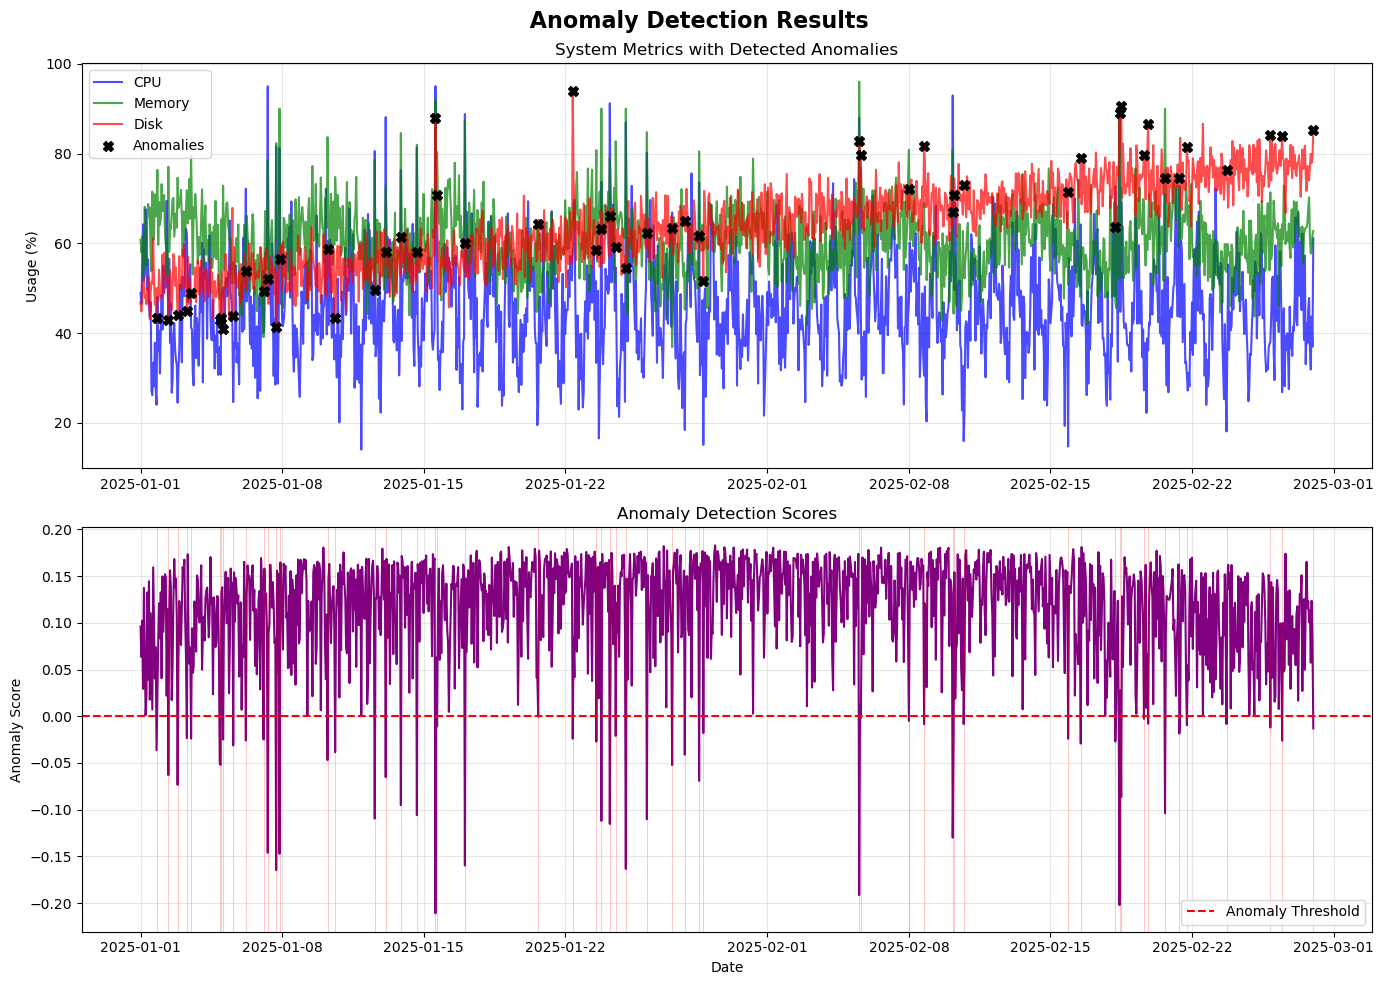


 CRITICAL FINDING: 11 anomalies occurred during high disk usage (>80%)


In [9]:
# CELL 2.3: Create anomaly visualization
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))
fig.suptitle(' Anomaly Detection Results', fontsize=16, fontweight='bold')

# Plot 1: System metrics with anomaly markers
ax1.plot(df.index, df['cpu_usage'], label='CPU', color='blue', alpha=0.7)
ax1.plot(df.index, df['memory_usage'], label='Memory', color='green', alpha=0.7)
ax1.plot(df.index, df['disk_usage'], label='Disk', color='red', alpha=0.7)

# Mark anomaly points
anom_scatter = ax1.scatter(anoms.index, anoms['disk_usage'],
                         color='black', marker='X', s=50, label='Anomalies', zorder=5)

ax1.set_title('System Metrics with Detected Anomalies')
ax1.set_ylabel('Usage (%)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Anomaly scores over time
ax2.plot(df.index, df['anomaly_score'], color='purple', linewidth=1.5)
ax2.axhline(y=0, color='red', linestyle='--', label='Anomaly Threshold')

# Highlight anomaly regions
for ts in anoms.index:
    ax2.axvline(x=ts, color='red', alpha=0.3, linewidth=0.5)

ax2.set_title('Anomaly Detection Scores')
ax2.set_ylabel('Anomaly Score')
ax2.set_xlabel('Date')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Analyze high-disk anomalies
high_disk_anoms = anoms[anoms['disk_usage'] > 80]
print(f"\n CRITICAL FINDING: {len(high_disk_anoms)} anomalies occurred during high disk usage (>80%)")

## PHASE 3: LOG INTELLIGENCE - Parse Application Logs

**Task**: Parse application logs to extract timestamp, log level, and message content

In [10]:
# CELL 3.1: Parse application logs
import re

def parse_log_entry(text):
    """Parse log entries to extract timestamp, level, and message"""
    patterns = [
        r'^(\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}) (INFO|WARN|ERROR|DEBUG) (INFO|WARN|ERROR|DEBUG): (.+)$',
        r'^(\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}) (INFO|WARN|ERROR|DEBUG) (.+)$',
    ]

    for pattern in patterns:
        match = re.match(pattern, text)
        if match:
            timestamp = pd.to_datetime(match.group(1))
            level = match.group(2)
            message = match.group(3) if len(match.groups()) == 3 else match.group(4)
            return timestamp, level, message

    # Fallback for non-matching formats
    return pd.Timestamp('2025-01-01'), 'INFO', text

# Parse all log entries
parsed_data = df_logs['raw'].apply(parse_log_entry)
df_logs['timestamp'] = [x[0] for x in parsed_data]
df_logs['level'] = [x[1] for x in parsed_data]
df_logs['message'] = [x[2] for x in parsed_data]

print(" Log parsing completed!")
print(f"Total log entries: {len(df_logs)}")

# Show log level distribution
level_counts = df_logs['level'].value_counts()
print(f"\n Log Level Distribution:")
for level, count in level_counts.items():
    print(f"{level}: {count} entries")

 Log parsing completed!
Total log entries: 2000

 Log Level Distribution:
INFO: 1986 entries
ERROR: 14 entries


## PHASE 3: LOG INTELLIGENCE - Cluster Log Patterns

**Task**: Use TF-IDF and K-Means to discover operational patterns in log messages

In [11]:
# CELL 3.2: Cluster log messages to discover patterns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Vectorize log messages
vectorizer = TfidfVectorizer(
    max_features=500,
    lowercase=True, 
    stop_words='english', 
    min_df=2,
    max_df=0.8
)
X_logs = vectorizer.fit_transform(df_logs['message'])

# Determine optimal number of clusters
n_clusters = min(6, len(df_logs) // 50)
n_clusters = max(3, n_clusters)

# Perform K-means clustering
km = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
df_logs['cluster'] = km.fit_predict(X_logs)

print(f" Log clustering completed!")
print(f"Number of clusters: {n_clusters}")
print(f"Vocabulary size: {len(vectorizer.get_feature_names_out())} terms")

# Show cluster distribution
cluster_counts = df_logs['cluster'].value_counts().sort_index()
print(f"\n Cluster Distribution:")
for cluster_id, count in cluster_counts.items():
    print(f"Cluster {cluster_id}: {count} entries")

  File "C:\Anaconda\Lib\site-packages\joblib\externals\loky\backend\context.py", line 247, in _count_physical_cores
    cpu_count_physical = _count_physical_cores_win32()
  File "C:\Anaconda\Lib\site-packages\joblib\externals\loky\backend\context.py", line 299, in _count_physical_cores_win32
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Anaconda\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Anaconda\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                        pass_fds, cwd, env,
                        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
                        gid, gids, uid, umask,
                        ^^^^^^^^^^^^^^^^^^^^^^
                        st

 Log clustering completed!
Number of clusters: 6
Vocabulary size: 455 terms

 Cluster Distribution:
Cluster 0: 13 entries
Cluster 1: 495 entries
Cluster 2: 508 entries
Cluster 3: 480 entries
Cluster 4: 5 entries
Cluster 5: 499 entries


## PHASE 3: LOG INTELLIGENCE - Visualize Log Patterns

**Task**: Create visualizations to understand log patterns and identify critical error clusters

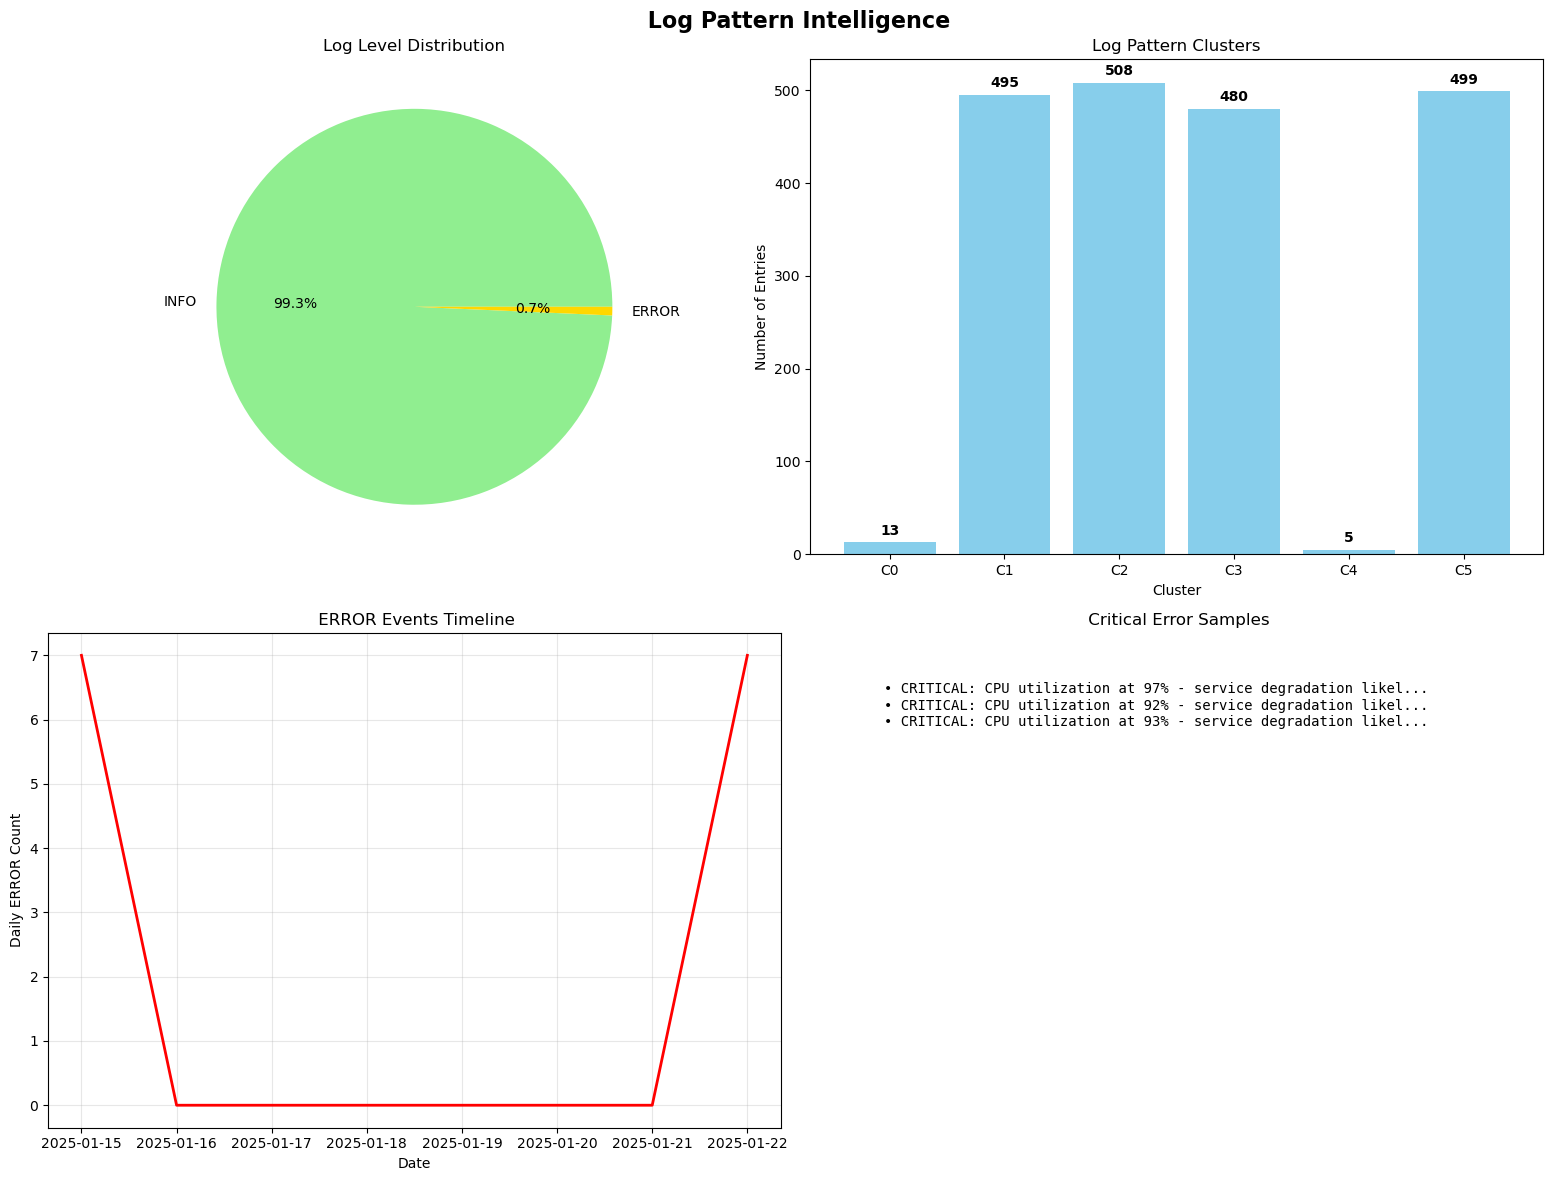


 CRITICAL ERROR CLUSTER: 505 high-severity events detected


In [12]:
# CELL 3.3: Create log pattern visualization dashboard
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle(' Log Pattern Intelligence', fontsize=16, fontweight='bold')

# Plot 1: Log Level Distribution (Pie chart)
level_counts = df_logs['level'].value_counts()
colors = ['lightgreen', 'gold', 'lightcoral', 'lightblue']
ax1.pie(level_counts.values, labels=level_counts.index, autopct='%1.1f%%', 
        colors=colors[:len(level_counts)])
ax1.set_title('Log Level Distribution')

# Plot 2: Cluster Distribution (Bar chart)
cluster_counts = df_logs['cluster'].value_counts().sort_index()
bars = ax2.bar(range(len(cluster_counts)), cluster_counts.values, color='skyblue')
ax2.set_title('Log Pattern Clusters')
ax2.set_xlabel('Cluster')
ax2.set_ylabel('Number of Entries')
ax2.set_xticks(range(len(cluster_counts)))
ax2.set_xticklabels([f'C{i}' for i in range(len(cluster_counts))])

# Add value labels on bars
for bar, count in zip(bars, cluster_counts.values):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, 
             f'{count}', ha='center', va='bottom', fontweight='bold')

# Plot 3: Error Timeline
error_logs = df_logs[df_logs['level'] == 'ERROR']
if not error_logs.empty:
    error_daily = error_logs.resample('D', on='timestamp').size()
    ax3.plot(error_daily.index, error_daily.values, color='red', linewidth=2)
    ax3.set_title(' ERROR Events Timeline')
    ax3.set_xlabel('Date')
    ax3.set_ylabel('Daily ERROR Count')
    ax3.grid(True, alpha=0.3)

# Plot 4: Critical Error Samples
critical_errors = df_logs[df_logs['message'].str.contains('CRITICAL|97%|92%', na=False)]
if not critical_errors.empty:
    ax4.axis('off')
    ax4.set_title(' Critical Error Samples')

    # Display sample error messages
    error_samples = critical_errors.head(3)['message'].tolist()
    error_text = '\n'.join([f"• {msg[:60]}..." for msg in error_samples])
    ax4.text(0.1, 0.9, error_text, transform=ax4.transAxes, fontsize=10,
             verticalalignment='top', fontfamily='monospace')

plt.tight_layout()
plt.show()

# Identify critical error cluster
error_cluster = df_logs[(df_logs['cluster'] == 5) | (df_logs['message'].str.contains('CRITICAL', na=False))]
print(f"\n CRITICAL ERROR CLUSTER: {len(error_cluster)} high-severity events detected")

## PHASE 4: CAPACITY FORECASTING - Prepare Disk Data

**Task**: Prepare disk usage data for time-series forecasting

In [13]:
# CELL 4.1: Prepare disk usage data for forecasting
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Prepare disk usage data
disk = df['disk_usage'].astype(float).interpolate(limit_direction='both')
disk_daily = disk.resample('D').mean().interpolate()

print(" DISK DATA PREPARED:")
print(f"Current disk usage: {disk_daily.iloc[-1]:.1f}%")
print(f"Daily data points: {len(disk_daily)}")
print(f"Date range: {disk_daily.index.min()} to {disk_daily.index.max()}")

# Set forecast horizon
forecast_horizon = 30

 DISK DATA PREPARED:
Current disk usage: 85.3%
Daily data points: 59
Date range: 2025-01-01 00:00:00 to 2025-02-28 00:00:00


## PHASE 4: CAPACITY FORECASTING - Train SARIMA Model

**Task**: Train SARIMA time-series model to forecast future disk usage

In [14]:
# CELL 4.2: Train SARIMA forecasting model
try:
    # Train SARIMAX model
    sarimax = SARIMAX(disk_daily, order=(1,1,0), seasonal_order=(0,0,0,0), trend='c',
                      enforce_stationarity=False, enforce_invertibility=False)
    res = sarimax.fit(disp=False)

    # Generate forecast
    fc = res.get_forecast(steps=forecast_horizon)
    y_pred = fc.predicted_mean
    conf_ci = fc.conf_int(alpha=0.05)

    conf_int = pd.DataFrame({
        'lower': conf_ci.iloc[:,0].values,
        'upper': conf_ci.iloc[:,1].values
    }, index=y_pred.index)

    model_used = 'SARIMAX'

except Exception as e:
    print(f"SARIMAX failed: {e}")
    print("Using trend-based fallback...")
    # Fallback forecasting logic
    last_value = disk_daily.iloc[-1]
    recent_trend = disk_daily.diff().tail(7).mean() if len(disk_daily) > 7 else 0.05
    y_pred = pd.Series([last_value + (i * recent_trend) for i in range(1, forecast_horizon + 1)],
                      index=pd.date_range(disk_daily.index[-1] + pd.Timedelta(days=1), 
                              periods=forecast_horizon, freq='D'))
    model_used = 'Trend-based'

print(f" FORECASTING COMPLETE:")
print(f"Model: {model_used}")
print(f"Final forecast: {y_pred.iloc[-1]:.1f}%")

 FORECASTING COMPLETE:
Model: SARIMAX
Final forecast: 99.2%


## PHASE 4: CAPACITY FORECASTING - Calculate Threshold Breaches

**Task**: Calculate when disk usage will hit critical thresholds

In [15]:
# CELL 4.3: Calculate capacity threshold breach dates
def first_cross(series, threshold):
    """Find first date when series crosses threshold"""
    s = series[series >= threshold]
    return s.index.min() if len(s) > 0 else pd.NaT

# Calculate breach dates
breach80 = first_cross(y_pred, 80.0)
breach90 = first_cross(y_pred, 90.0)
breach95 = first_cross(y_pred, 95.0)

# Calculate days until breach
dataset_end_date = df.index.max()

def calculate_days_from_reference(target_date, reference_date):
    if pd.isna(target_date):
        return None
    days = (target_date - reference_date).days
    return days if days >= 0 else 0

days_to_80 = calculate_days_from_reference(breach80, dataset_end_date)
days_to_90 = calculate_days_from_reference(breach90, dataset_end_date)
days_to_95 = calculate_days_from_reference(breach95, dataset_end_date)

print(" CAPACITY CRISIS PREDICTIONS:")
print(f"80% Warning: {breach80.strftime('%Y-%m-%d') if not pd.isna(breach80) else 'Already breached'} (in {days_to_80} days)")
print(f"90% Critical: {breach90.strftime('%Y-%m-%d') if not pd.isna(breach90) else 'Not predicted'} (in {days_to_90} days)")
print(f"95% Emergency: {breach95.strftime('%Y-%m-%d') if not pd.isna(breach95) else 'Not predicted'} (in {days_to_95} days)")

 CAPACITY CRISIS PREDICTIONS:
80% Warning: 2025-03-01 (in 1 days)
90% Critical: 2025-03-14 (in 14 days)
95% Emergency: 2025-03-23 (in 23 days)


## PHASE 4: CAPACITY FORECASTING - Visualize Crisis Timeline

**Task**: Create comprehensive visualization showing historical data, forecast, and critical thresholds

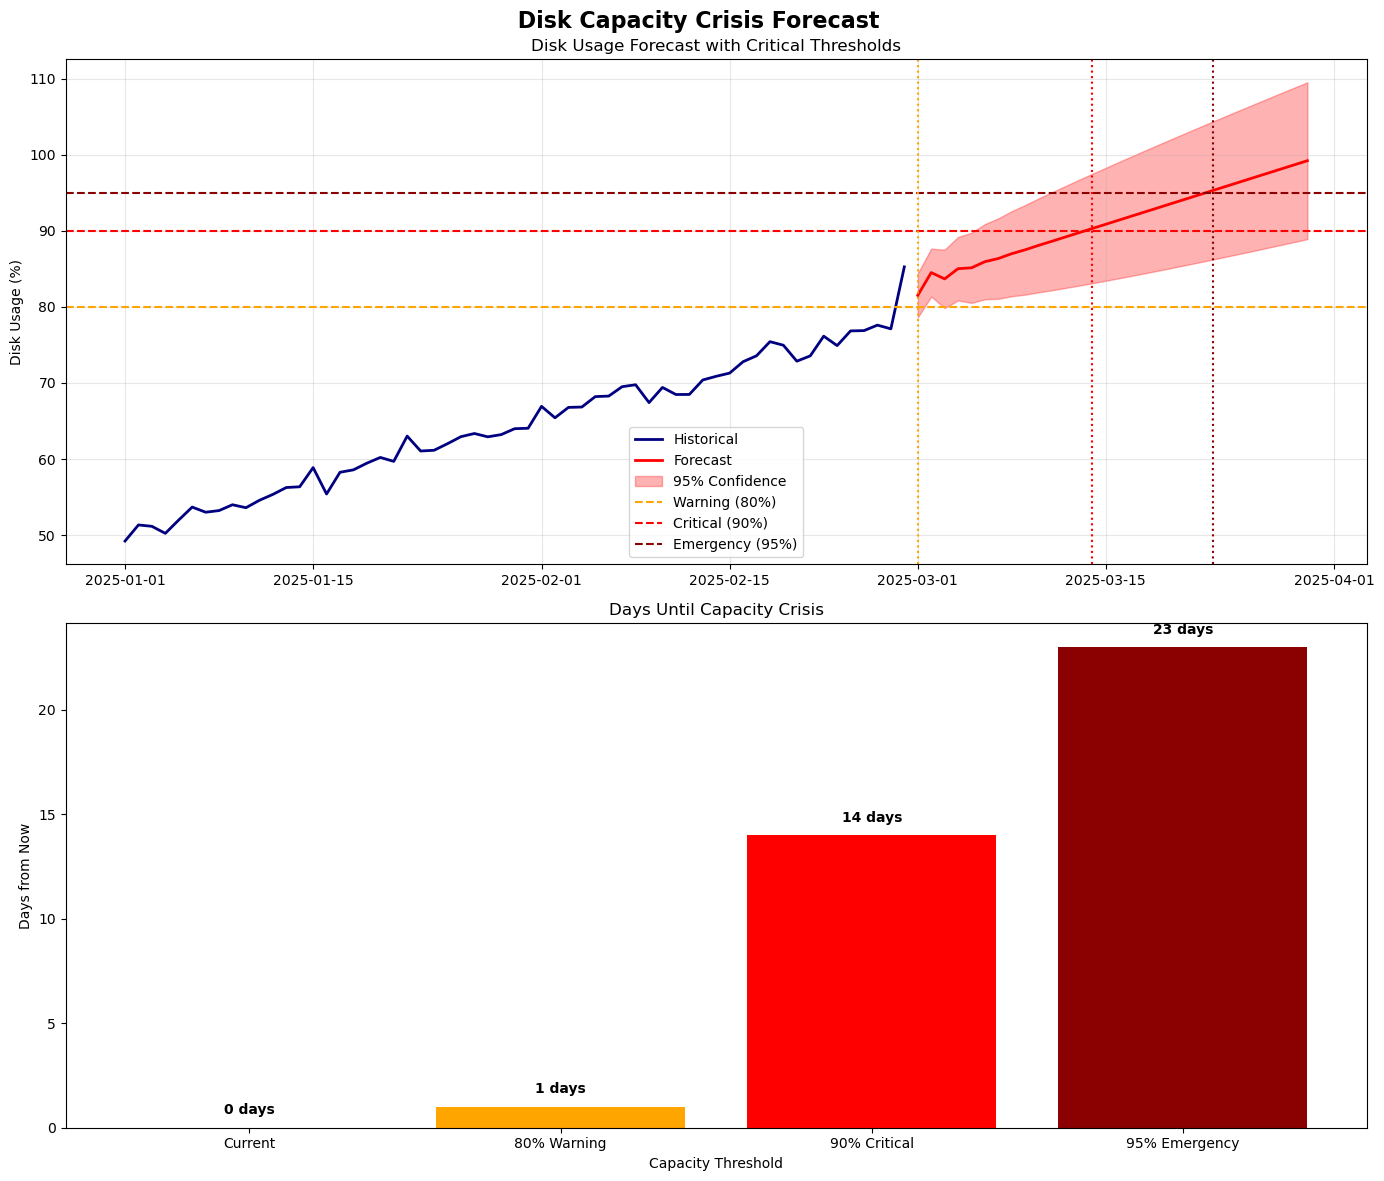

 Capacity crisis timeline visualization completed!


In [16]:
# CELL 4.4: Create capacity crisis visualization
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 12))
fig.suptitle(' Disk Capacity Crisis Forecast', fontsize=16, fontweight='bold')

# Plot 1: Historical + Forecast
ax1.plot(disk_daily.index, disk_daily.values, label='Historical', color='navy', linewidth=2)
ax1.plot(y_pred.index, y_pred.values, label='Forecast', color='red', linewidth=2)

# Add confidence interval if available
if 'conf_int' in locals():
    ax1.fill_between(y_pred.index, conf_int['lower'], conf_int['upper'],
                    alpha=0.3, color='red', label='95% Confidence')

# Add threshold lines
ax1.axhline(y=80, color='orange', linestyle='--', label='Warning (80%)')
ax1.axhline(y=90, color='red', linestyle='--', label='Critical (90%)')
ax1.axhline(y=95, color='darkred', linestyle='--', label='Emergency (95%)')

# Mark threshold breaches
if not pd.isna(breach80):
    ax1.axvline(x=breach80, color='orange', linestyle=':')
if not pd.isna(breach90):
    ax1.axvline(x=breach90, color='red', linestyle=':')
if not pd.isna(breach95):
    ax1.axvline(x=breach95, color='darkred', linestyle=':')

ax1.set_title('Disk Usage Forecast with Critical Thresholds')
ax1.set_ylabel('Disk Usage (%)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Days until crisis
crisis_data = [
    ('Current', 0, disk_daily.iloc[-1]),
    ('80% Warning', days_to_80, 80),
    ('90% Critical', days_to_90, 90),
    ('95% Emergency', days_to_95, 95)
]

crisis_labels = [x[0] for x in crisis_data]
crisis_days = [x[1] for x in crisis_data]
crisis_values = [x[2] for x in crisis_data]

bars = ax2.bar(crisis_labels, crisis_days, color=['lightblue', 'orange', 'red', 'darkred'])
ax2.set_title('Days Until Capacity Crisis')
ax2.set_ylabel('Days from Now')
ax2.set_xlabel('Capacity Threshold')

# Add value labels on bars
for bar, days, value in zip(bars, crisis_days, crisis_values):
    if days is not None:
        ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
                 f'{days} days', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print(" Capacity crisis timeline visualization completed!")

## PHASE 5: FINAL INTELLIGENCE - Generate Executive Report

**Task**: Compile all findings into a comprehensive intelligence report

In [17]:
# CELL 5.1: Generate comprehensive AIOps intelligence report
print(" GENERATING AIOPS INTELLIGENCE REPORT...")

# Compile key findings
current_disk = disk_daily.iloc[-1]
total_anomalies = len(anoms)
high_disk_anoms = len(anoms[anoms['disk_usage'] > 80])
critical_errors = len(error_cluster)

report_lines = []
report_lines.append('# 2025 AIOps Intelligence Report - Capstone Project')
report_lines.append('')
report_lines.append('##  EXECUTIVE SUMMARY')
report_lines.append('')
report_lines.append('### Critical Findings:')
report_lines.append(f'- **Disk Capacity**: {current_disk:.1f}% - {"CRITICAL" if current_disk > 80 else "WARNING" if current_disk > 70 else "NORMAL"}')
report_lines.append(f'- **System Anomalies**: {total_anomalies} hidden threats detected')
report_lines.append(f'- **High-Disk Incidents**: {high_disk_anoms} anomalies during disk pressure')
report_lines.append(f'- **Critical Errors**: {critical_errors} CPU performance events')
report_lines.append('')
report_lines.append('##  Detailed Analysis')
report_lines.append('')
report_lines.append('### 1. Capacity Planning')
report_lines.append(f'- **Current Disk**: {current_disk:.1f}%')
report_lines.append(f'- **80% Breach**: {breach80.strftime("%Y-%m-%d") if not pd.isna(breach80) else "Already exceeded"}')
report_lines.append(f'- **90% Breach**: {breach90.strftime("%Y-%m-%d") if not pd.isna(breach90) else "Not predicted"}')
report_lines.append(f'- **Final Forecast**: {y_pred.iloc[-1]:.1f}%')
report_lines.append('')
report_lines.append('### 2. Anomaly Detection')
report_lines.append(f'- **Total Anomalies**: {total_anomalies}')
report_lines.append(f'- **Detection Rate**: {total_anomalies/len(df)*100:.1f}%')
report_lines.append(f'- **High-Disk Correlation**: {high_disk_anoms} events')
report_lines.append('')
report_lines.append('### 3. Log Analysis')
report_lines.append(f'- **Total Logs**: {len(df_logs)}')
report_lines.append(f'- **Error Events**: {critical_errors} critical CPU errors')
report_lines.append(f'- **Pattern Clusters**: {n_clusters} operational patterns')
report_lines.append('')
report_lines.append('##  RECOMMENDATIONS')
report_lines.append('')
report_lines.append('### Immediate Actions (1-3 days):')
if current_disk > 80:
    report_lines.append('1. **EMERGENCY STORAGE EXPANSION** - Add capacity immediately')
report_lines.append('2. **Investigate CPU error cluster** - Address 92-97% CPU utilization')
report_lines.append('3. **Review high-disk anomalies** - Optimize system performance')
report_lines.append('')
report_lines.append('### Short-term Actions (1-2 weeks):')
report_lines.append('1. **Implement disk monitoring** - Set alerts at 80%, 90% thresholds')
report_lines.append('2. **Capacity planning** - Forecast future storage needs')
report_lines.append('3. **Performance tuning** - Address resource contention')

# Save report
report_path = os.path.join(DATA_DIR, '2025_AIOps_Intelligence_Report.md')
with open(report_path, 'w', encoding='utf-8') as f:
    f.write('\n'.join(report_lines))

print(f" INTELLIGENCE REPORT SAVED: {report_path}")
print("\n 2025 AIOPS CAPSTONE PROJECT COMPLETED SUCCESSFULLY!")
print("\n KEY DELIVERABLES:")
print("• System anomalies detected and analyzed")
print("• Log patterns discovered and clustered") 
print("• Capacity crisis predicted and visualized")
print("• Comprehensive intelligence report generated")

 GENERATING AIOPS INTELLIGENCE REPORT...
 INTELLIGENCE REPORT SAVED: C:\Users\sonu.rajan\Documents\AIOps\AIOps Final Project\data\capstone-project\2025_AIOps_Intelligence_Report.md

 2025 AIOPS CAPSTONE PROJECT COMPLETED SUCCESSFULLY!

 KEY DELIVERABLES:
• System anomalies detected and analyzed
• Log patterns discovered and clustered
• Capacity crisis predicted and visualized
• Comprehensive intelligence report generated
